# Machine Learning: Regression - Predicting Energy Efficiency of Buildings

## Stage B Project(Tag-Along Codes for the Graded Assessment)

By [Raqib](https://raqibcodes.me/). <br>
Check my GitHub [repo](https://github.com/Abdulraqib20) for more of my projects.

In [1]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style='white')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression, Ridge, Lasso
from sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm

In [2]:
# read csv file
df = pd.read_csv('energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
# summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [4]:
# chekcking for null values
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [5]:
# convert date to a datetime datatype
df['date'] = pd.to_datetime(df['date'])
df['date']

0       2016-01-11 17:00:00
1       2016-01-11 17:10:00
2       2016-01-11 17:20:00
3       2016-01-11 17:30:00
4       2016-01-11 17:40:00
                ...        
19730   2016-05-27 17:20:00
19731   2016-05-27 17:30:00
19732   2016-05-27 17:40:00
19733   2016-05-27 17:50:00
19734   2016-05-27 18:00:00
Name: date, Length: 19735, dtype: datetime64[ns]

**Question:** From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the R^2 value in two d.p.?

In [6]:
x = df['T2']
y = df['T6']

# check first 5 rows of data
print(x.iloc[:5])
print()
print(y.iloc[:5])

0    19.2
1    19.2
2    19.2
3    19.2
4    19.2
Name: T2, dtype: float64

0    7.026667
1    6.833333
2    6.560000
3    6.433333
4    6.366667
Name: T6, dtype: float64


In [7]:
x = df['T2']
y = df['T6']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
r_squared = model.rsquared
print(f"The R-squared value is: {r_squared:.2f}")

The R-squared value is: 0.64


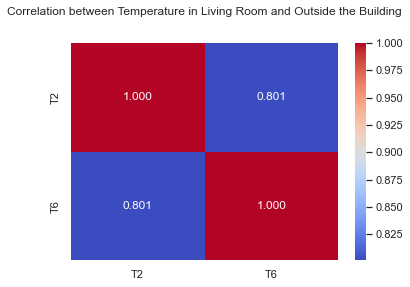

In [8]:
corr = df[['T2', 'T6']]
sns.heatmap(corr.corr(), annot=True, fmt='.3f', cmap='coolwarm')
plt.title('Correlation between Temperature in Living Room and Outside the Building', y=1.1)
plt.show();

### Questions
Normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a random state of 42 (for reproducibility). Run a multiple linear regression using the training set and evaluate your model on the test set. Answer the following questions: <br>
<ul>
    <li>What is the Mean Absolute Error (in two decimal places)?</li>
<li>What is the Coefficient of Determination (in two decimal places)?</li>
    <li>What is the Residual Sum of Squares (in two decimal places)?</li>
    <li>What is the Root Mean Squared Error (in three decimal places)?</li>
    <li>What is the Coefficient of Determination (in two decimal places)?</li>
</ul>

In [9]:
# drop date, lights and Appliances from independent variable, X
X = df.drop(['date', 'lights', 'Appliances'], axis=1)
y  = df['Appliances']

# Normalize the dataset using the MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_df = pd.DataFrame(X_scaled, columns=X.columns)

# Use a 70-30 train-test set split with a random state of 42
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state=42)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred)
print('The Mean Absolute error is = {}'.format(MAE))

print('Residual Sum of Squares: {}'.format(r2_score(y_pred, y_test)))
print(' Root Mean Squared Error: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

The Mean Absolute error is = 53.64297765584961
Residual Sum of Squares: -4.4118937472949
 Root Mean Squared Error: 93.6404609399803


### Question
Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?

In [11]:
# Get the feature weights
feature_weights = model.coef_

# Create a DataFrame with feature names and weights
weights_df = pd.DataFrame({'Feature': X_train.columns, 'Weight': feature_weights})

# Sort the DataFrame by weights in ascending order
weights_df_sorted = weights_df.sort_values('Weight')

# Extract the feature with the lowest weight
lowest_weight_feature = weights_df_sorted['Feature'].iloc[0]

# Extract the feature with the highest weight
highest_weight_feature = weights_df_sorted['Feature'].iloc[-1]

print(f"Feature with the lowest weight: {lowest_weight_feature}")
print(f"Feature with the highest weight: {highest_weight_feature}")

Feature with the lowest weight: RH_2
Feature with the highest weight: RH_1


### Question
Train a ridge regression model with an alpha value of 0.4. Is there any change to the root mean squared error (RMSE) when evaluated on the test set?

In [12]:
# Initialize and train the Ridge regression model
ridge_model = Ridge(alpha=0.4)
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Calculate RMSE before Ridge regression
rmse_before = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate RMSE after Ridge regression
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
rmse_after = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

# Compare the RMSE values
print(f"RMSE before Ridge regression: {rmse_before:.2f}")
print(f"RMSE after Ridge regression: {rmse_after:.2f}")

RMSE before Ridge regression: 93.66
RMSE after Ridge regression: 93.66


### Question
Train a ridge regression model with an alpha value of 0.4. Is there any change to the root mean squared error (RMSE) when evaluated on the test set?

In [13]:
# Initialize and train the Lasso regression model with an alpha value of 0.001
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train, y_train)

# Get the feature weights
feature_weights = lasso_model.coef_

# Count the number of features with non-zero weights
non_zero_features = sum(feature_weights != 0)

print(f"Number of features with non-zero weights: {non_zero_features}")

Number of features with non-zero weights: 25


### Question
What is the new RMSE with the lasso regression? (Answer should be in three (3) decimal places)

In [14]:
# Initialize and train the Lasso regression model
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Calculate the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"RMSE with Lasso regression: {rmse:.3f}")

RMSE with Lasso regression: 93.641
